## Credit Card Fraud Detection

Data Source: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

Notebook Overview:
1. Importing Libraries
2. Loading Data
3. Cleaning Data
4. Data Exploration
5. Model fitting
6. Visualizing Results

### 1. Importing Libraries

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

### 2. Loading Data

In [72]:
CreditCardDataRaw = pd.read_csv('CreditCardFraudData.csv', index_col=0)
CreditCardDataRaw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

### 3. Cleaning Data

In [73]:
CreditCardDataRaw.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [74]:
CreditCardDataRaw.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [75]:
CreditCardDataRenamed = CreditCardDataRaw.rename(columns={'cc_num':'id', 'amt': 'transaction_amount', 'dob': 'date_of_birth'})

In [76]:
# Converting column types to relevant types
CreditCardDataTypesUpdates = CreditCardDataRenamed
CreditCardDataTypesUpdates['is_fraud'] = CreditCardDataTypesUpdates['is_fraud'].astype(bool)
CreditCardDataTypesUpdates['id'] = CreditCardDataTypesUpdates['id'].astype(object)
CreditCardDataTypesUpdates['zip'] = CreditCardDataTypesUpdates['zip'].astype(str)
CreditCardDataTypesUpdates['trans_date_trans_time'] = CreditCardDataTypesUpdates['trans_date_trans_time'].astype(str)

In [77]:
CreditCardDataTypesUpdates.head()

,trans_date_trans_time,id,merchant,category,transaction_amount,first,last,gender,street,city,...,lat,long,city_pop,job,date_of_birth,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2291160000000000.0,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,False
1,21/06/2020 12:14,3573030000000000.0,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,False
2,21/06/2020 12:14,3598220000000000.0,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,False
3,21/06/2020 12:15,3591920000000000.0,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,False
4,21/06/2020 12:15,3526830000000000.0,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,False


In [78]:
ohe = OneHotEncoder()
CreditCardDataDummy = CreditCardDataTypesUpdates
CreditCardDataDummy[ohe.get_feature_names_out()] = ohe.fit_transform(CreditCardDataDummy[['category']]).toarray()
CreditCardDataDummy[ohe.get_feature_names_out()] = ohe.fit_transform(CreditCardDataDummy[['gender']]).toarray()
CreditCardDataDummy.head()

,trans_date_trans_time,id,merchant,category,transaction_amount,first,last,gender,street,city,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,21/06/2020 12:14,2291160000000000.0,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21/06/2020 12:14,3573030000000000.0,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21/06/2020 12:14,3598220000000000.0,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,21/06/2020 12:15,3591920000000000.0,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,21/06/2020 12:15,3526830000000000.0,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [79]:
CreditCardDataStandardised = CreditCardDataDummy
CreditCardDataStandardised['standardised_transaction_amount'] = (CreditCardDataStandardised['transaction_amount'] - CreditCardDataStandardised['transaction_amount'].mean()) / CreditCardDataStandardised['transaction_amount'].std()  
CreditCardDataStandardised.head()

,trans_date_trans_time,id,merchant,category,transaction_amount,first,last,gender,street,city,...,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,standardised_transaction_amount
0,21/06/2020 12:14,2291160000000000.0,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.424463
1,21/06/2020 12:14,3573030000000000.0,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.252337
2,21/06/2020 12:14,3598220000000000.0,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.179353
3,21/06/2020 12:15,3591920000000000.0,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.059605
4,21/06/2020 12:15,3526830000000000.0,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.422357


### 4. Data Exploration

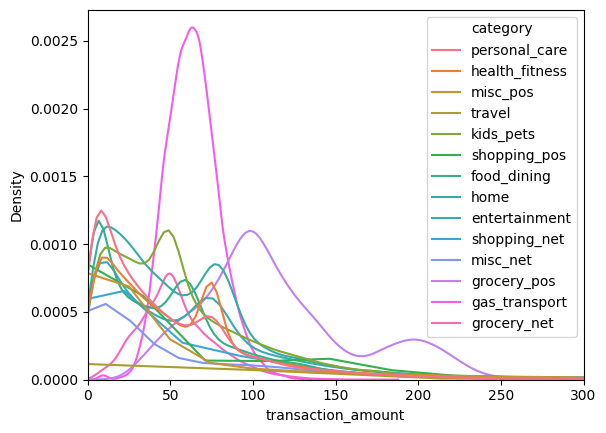

In [80]:
ax = sns.kdeplot(data=CreditCardDataDummy, x='transaction_amount', hue='category')
ax = ax.set_xlim(0,300)

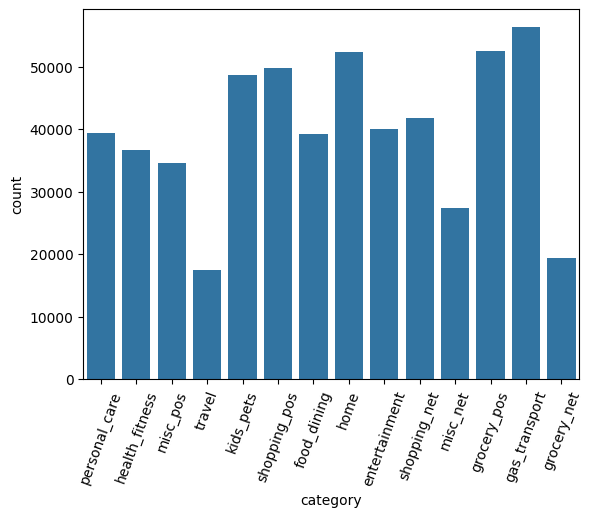

In [81]:
ax = sns.countplot(data=CreditCardDataDummy, x='category')
ax.tick_params(axis='x', rotation=70)

### 5. Model Fitting

In [82]:
CreditCardDataStandardised.columns

Index(['trans_date_trans_time', 'id', 'merchant', 'category',
       'transaction_amount', 'first', 'last', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'date_of_birth',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M',
       'standardised_transaction_amount'],
      dtype='object')

In [83]:
columns = ['category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M',
       'standardised_transaction_amount']
labels=CreditCardDataStandardised['is_fraud'].to_numpy()
features = CreditCardDataStandardised[columns]

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.2, random_state=13)

In [84]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(17,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=8, batch_size=1, verbose=1)

d:\Programs\Python\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
444575/444575 ━━━━━━━━━━━━━━━━━━━━ 487s 1ms/step - accuracy: 0.9961 - loss: 0.0187
Epoch 2/8
444575/444575 ━━━━━━━━━━━━━━━━━━━━ 488s 1ms/step - accuracy: 0.9967 - loss: 0.0118
Epoch 3/8
444575/444575 ━━━━━━━━━━━━━━━━━━━━ 490s 1ms/step - accuracy: 0.9968 - loss: 0.0110
Epoch 4/8
444575/444575 ━━━━━━━━━━━━━━━━━━━━ 491s 1ms/step - accuracy: 0.9968 - loss: 0.0106
Epoch 5/8
444575/444575 ━━━━━━━━━━━━━━━━━━━━ 647s 1ms/step - accuracy: 0.9973 - loss: 0.0090
Epoch 6/8
444575/444575 ━━━━━━━━━━━━━━━━━━━━ 758s 2ms/step - accuracy: 0.9973 - loss: 0.0092
Epoch 7/8
444575/444575 ━━━━━━━━━━━━━━━━━━━━ 753s 2ms/step - accuracy: 0.9974 - loss: 0.0083
Epoch 8/8
444575/444575 ━━━━━━━━━━━━━━━━━━━━ 750s 2ms/step - accuracy: 0.9974 - loss: 0.0087


In [85]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

3474/3474 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3474/3474 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9980 - loss: 0.0073
[0.00830718595534563, 0.9978316426277161]
